In [1]:
! pip install numpy
! pip install matplotlib
! pip install scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Class Definition

In [38]:
class LinearRegressor:
    def __init__(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Initialize the LinearRegressor with data.

        Args:
            X (np.ndarray): The input feature matrix of shape (m, n), where m is the number of examples 
                            and n is the number of features.
            y (np.ndarray): The target values of shape (m, 1), where m is the number of examples.

        Attributes:
            X (np.ndarray): The input feature matrix with a column of ones added for the bias term.
            y (np.ndarray): The target values.
            theta (np.ndarray): The weight vector (including the bias term).
            predictions (np.ndarray): The initial predictions based on the randomly initialized weights.
        """
        self.bias = ones_column = np.ones((X.shape[0], 1))  # Create a column of ones
        self.X = np.hstack([ones_column, X]) # predict
        self.y = y # target
        # self.theta = np.random.randn(2, 1) # Random initialization of weights
        self.theta = np.random.randn(self.X.shape[1], 1)
        self.predictions = self.X.dot(self.theta) # TODO: CHECK bias must be added or not?

    def train(self, learning_rate: float = 0.1, n_iterations: int = 1000, reg_lambda: float = 0.01) -> None:
        """
        Train the LinearRegressor model using gradient descent with L2 regularization.

        Args:
            learning_rate (float): The learning rate (alpha) for gradient descent.
            n_iterations (int): The number of iterations to perform in gradient descent.
            reg_lambda (float): The regularization parameter (lambda) for L2 regularization.
        """
        m = self.X.shape[0]  # Number of training examples

        for _ in range(n_iterations):
            self.predictions = self.X.dot(self.theta)
            errors = self.predictions - self.y  # Error between predictions and actual values
            # np.r_[[[0]], self.theta[1:] is beacuse theta_0 does not must be penalized
            gradient = (1 / m) * self.X.T.dot(errors) + (reg_lambda / m) * np.r_[[[0]], self.theta[1:]]
            
            # Update the weights (theta)
            self.theta -= learning_rate * gradient

    def predict(self, X_new: np.ndarray) -> np.ndarray:
        """
        Predict the target values for new data using the learned model.

        Args:
            X_new (np.ndarray): New input data for predictions.

        Returns:
            np.ndarray: Predicted target values.
        """
        ones_column = np.ones((X_new.shape[0], 1))
        X_new = np.hstack([ones_column, X_new])
        return X_new.dot(self.theta)
    
    def plot(self) -> None:
        """
        The plot method excludes the bias column from the x-axis for better visualization of the features.
        """
        plt.scatter(self.X[:, 1:], self.y, color='blue', label="Data points")
        plt.plot(self.X[:, 1:], self.predict(self.X[:, 1:]), color='red', label="Regression line")
        plt.ylabel("y: The target values (labels)")
        plt.xlabel("X: The input data (features)")
        plt.legend()
        plt.show()

    def mse(self, X: np.ndarray, y: np.ndarray) -> float:
        ones_column = np.ones((X.shape[0], 1))
        X = np.hstack([ones_column, X])  # Add bias to new data
        predictions = X.dot(self.theta)
        return np.mean((predictions - y) ** 2)

    def r_squared(self, X: np.ndarray, y: np.ndarray) -> float:
        ones_column = np.ones((X.shape[0], 1))
        X = np.hstack([ones_column, X])  # Add bias to new data
        predictions = X.dot(self.theta)
        mean_of_y = np.mean(y)
        ss_tot = np.sum((y - mean_of_y) ** 2)
        ss_res = np.sum((y - predictions) ** 2)
        return 1 - (ss_res / ss_tot)

# Generate Data

In [39]:
# STEP 2:
X_1 = np.random.rand(200, 1)  # 200 samples, single feature
y_1 = 4 + 3 * X_1 + np.random.randn(200, 1)  # y = 3x + 4 + noise

X_2 = np.random.rand(200, 1)  # 200 samples, single feature
y_2 = 10 - 2 * X_2 + np.random.randn(200, 1)  # y = 10 - 2x + noise

X_concated = np.concatenate((X_1, X_2), axis=0)
y_concated = np.concatenate((y_1, y_2), axis=0)

index_col = np.arange(len(y_concated)) 

# Create bins for stratification (e.g., 10 bins)
bins = np.linspace(0, len(index_col), 10)  # Dividing indices into 10 bins
index_binned = np.digitize(index_col, bins)  # Convert indices into bin numbers

# Split the data into train and test sets (72% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_concated, y_concated, stratify=index_binned,test_size=0.3, random_state=42)

# Print the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Train the model using LinearRegressor on training data
regressor = LinearRegressor(X_train, y_train)
regressor.train(learning_rate=0.01, n_iterations=1000)

# Calculate MSE and R-squared for training data
train_mse = regressor.mse(X_train, y_train)
train_r2 = regressor.r_squared(X_train, y_train)

# Calculate MSE and R-squared for test data
test_mse = regressor.mse(X_test, y_test)
test_r2 = regressor.r_squared(X_test, y_test)

# Print the results
print(f"Training MSE: {train_mse:.4f}, Training R-squared: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test R-squared: {test_r2:.4f}")


X_train shape: (280, 1)
X_test shape: (120, 1)
y_train shape: (280, 1)
y_test shape: (120, 1)
Training MSE: 4.7330, Training R-squared: -0.0129
Test MSE: 4.5398, Test R-squared: -0.0348


# Process Data

Weights (theta): 
[[6.42793439]
 [1.55267715]]
Mean Squared Error (MSE) on the concatenated training set: 4.669274266047792
R-squared (R^2) on the concatenated training set: -0.01719933361283399


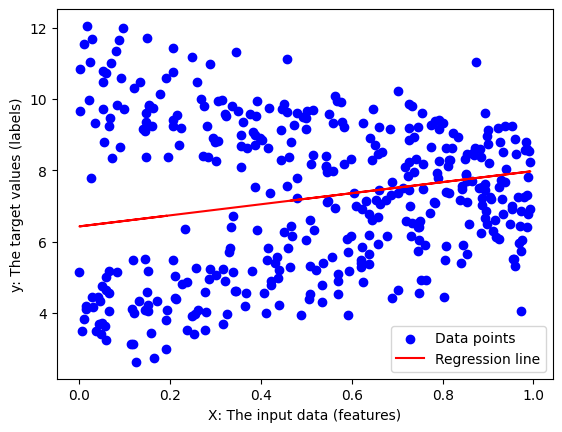

In [40]:
# STEP 3:
#TODO: Train one regressor on concatenated data and plot the line and data together followed by printing weights and mse and r^2
regressor_concated = LinearRegressor(X_concated, y_concated)
regressor_concated.train(learning_rate=0.01, n_iterations=1000)

# Make predictions on the test set
y_pred = regressor_concated.predict(X_test)

# Print weights, MSE, and R-squared for the model on training data
train_mse_concated = regressor_concated.mse(X_concated, y_concated)
train_r2_concated = regressor_concated.r_squared(X_concated, y_concated)
print(f"Weights (theta): \n{regressor_concated.theta}")
print(f"Mean Squared Error (MSE) on the concatenated training set: {train_mse_concated}")
print(f"R-squared (R^2) on the concatenated training set: {train_r2_concated}")

# Plot the regression line and data points
regressor_concated.plot()

Weights (theta) for first split: 
[[4.19104367]
 [2.57175908]]
Mean Squared Error (MSE) on the training set (first split): 0.802738203083067
R-squared (R^2) on the training set (first split): 0.5151884501496492


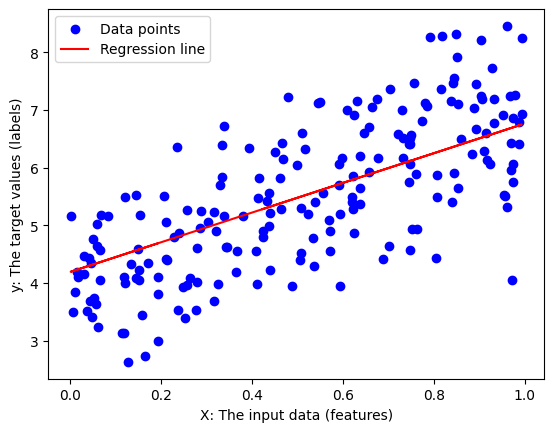

In [41]:
# STEP 4:
#TODO: Train one regressor on first split of data and plot the line and data together followed by printing weights and mse and r^2
regressor_1 = LinearRegressor(X_1, y_1)
regressor_1.train(learning_rate=0.01, n_iterations=1000)

# Make predictions on the test set
y_pred_1 = regressor_1.predict(X_test)

# Print weights, MSE, and R-squared for the model on training set
train_mse_1 = regressor_1.mse(X_1, y_1)
train_r2_1 = regressor_1.r_squared(X_1, y_1)
print(f"Weights (theta) for first split: \n{regressor_1.theta}")
print(f"Mean Squared Error (MSE) on the training set (first split): {train_mse_1}")
print(f"R-squared (R^2) on the training set (first split): {train_r2_1}")

# Plot the regression line and data points
regressor_1.plot()

Weights (theta) for second split: 
[[8.75182308]
 [0.37102138]]
Mean Squared Error (MSE) on the training set (second split): 1.4092446105425276
R-squared (R^2) on the training set (second split): -0.12884573268570576


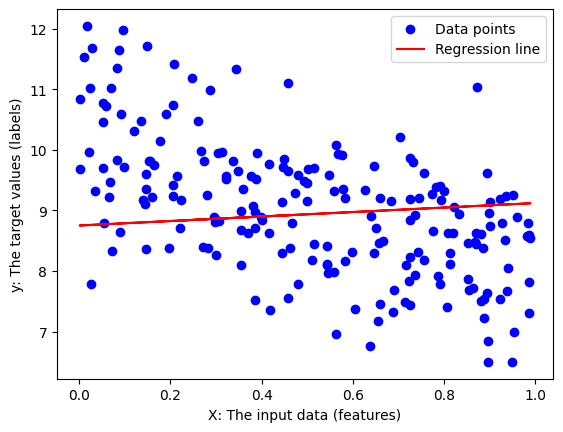

In [42]:
# STEP 4:
#TODO: #TODO: Train one regressor on second split of data and plot the line and data together followed by printing weights and mse and r^2
regressor_2 = LinearRegressor(X_2, y_2)
regressor_2.train(learning_rate=0.01, n_iterations=1000)

# Make predictions on the test set
y_pred_2 = regressor_2.predict(X_test)

# Print weights, MSE, and R-squared for the model on training set
train_mse_2 = regressor_2.mse(X_2, y_2)
train_r2_2 = regressor_2.r_squared(X_2, y_2)
print(f"Weights (theta) for second split: \n{regressor_2.theta}")
print(f"Mean Squared Error (MSE) on the training set (second split): {train_mse_2}")
print(f"R-squared (R^2) on the training set (second split): {train_r2_2}")

# Plot the regression line and data points
regressor_2.plot()

Comparison: Testing different lambda values on model X1

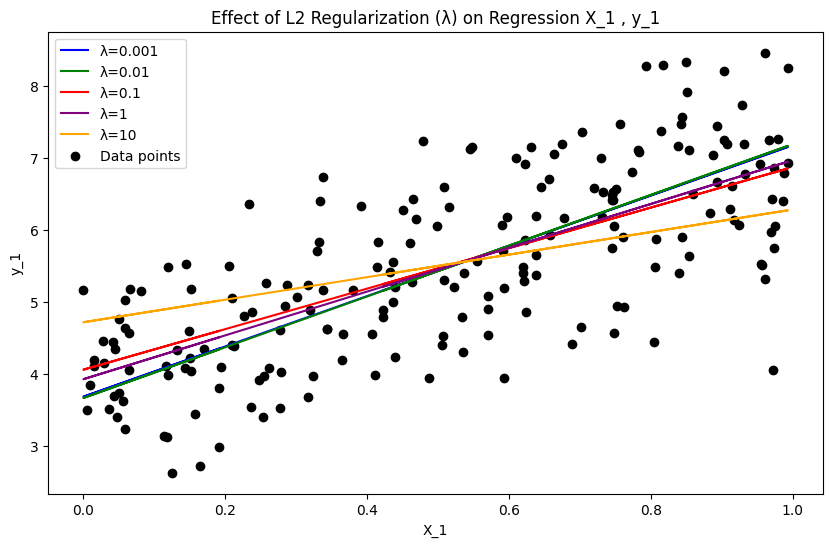

In [43]:
# STEP 4:

# comparison
# Testing different lambda values
lambda_values = [0.001, 0.01, 0.1, 1, 10]
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10, 6))

for i, reg_lambda in enumerate(lambda_values):
    # Train the regressor on X_1, y_1 dataset with different λ values
    regressor_concated = LinearRegressor(X_1, y_1)
    regressor_concated.train(learning_rate=0.01, n_iterations=1000, reg_lambda=reg_lambda)
    
    # Plot the regression line for each λ value
    plt.plot(X_1, regressor_concated.predict(X_1), color=colors[i], label=f"λ={reg_lambda}")

# Plot the original data points
plt.scatter(X_1, y_1, color='black', label="Data points")

# Set title and labels
plt.title('Effect of L2 Regularization (λ) on Regression X_1 , y_1')
plt.xlabel('X_1')
plt.ylabel('y_1')
plt.legend()
plt.show()

Comparison: Testing different lambda values on model X2

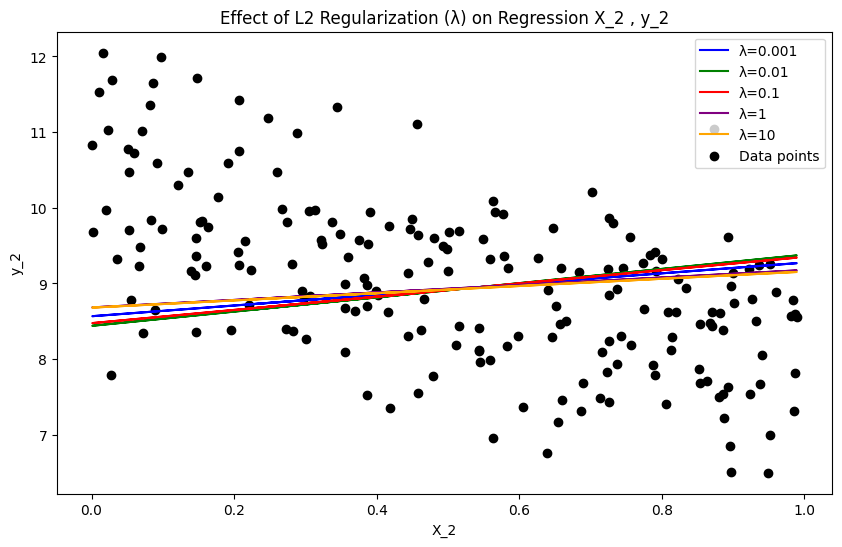

In [44]:
# STEP 4:

# comparison
# Testing different lambda values
lambda_values = [0.001, 0.01, 0.1, 1, 10]
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10, 6))

for i, reg_lambda in enumerate(lambda_values):
    # Train the regressor on X_2, y_2 dataset with different λ values
    regressor_concated = LinearRegressor(X_2, y_2)
    regressor_concated.train(learning_rate=0.01, n_iterations=1000, reg_lambda=reg_lambda)
    
    # Plot the regression line for each λ value
    plt.plot(X_2, regressor_concated.predict(X_2), color=colors[i], label=f"λ={reg_lambda}")

# Plot the original data points
plt.scatter(X_2, y_2, color='black', label="Data points")

# Set title and labels
plt.title('Effect of L2 Regularization (λ) on Regression X_2 , y_2')
plt.xlabel('X_2')
plt.ylabel('y_2')
plt.legend()
plt.show()

# Comparison

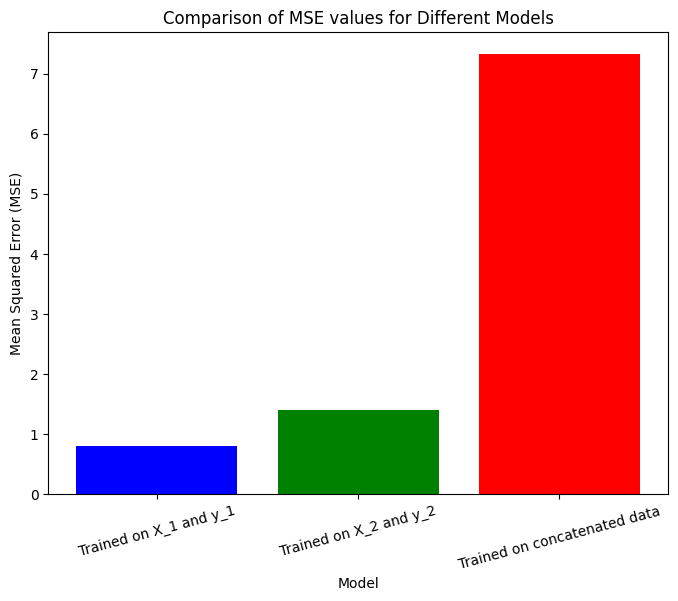

Plotting the R-squared values for the three models


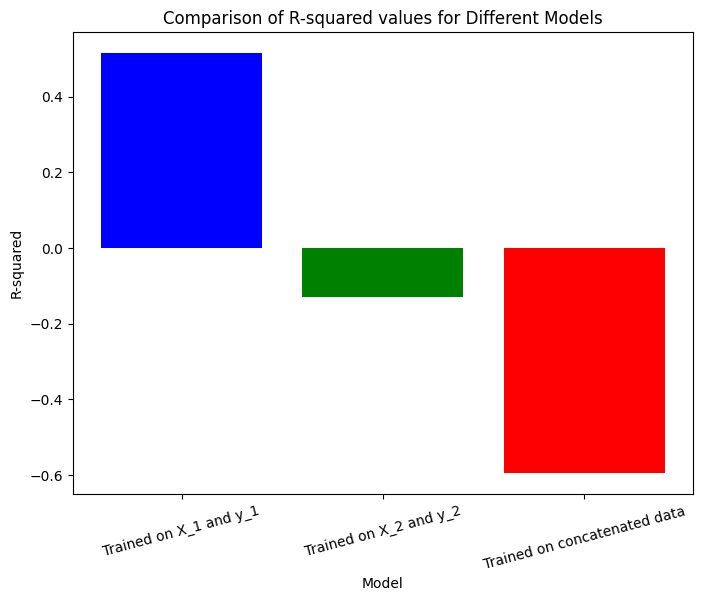

In [45]:
# STEP 5:

#TODO: Plot the mse and r^2 of 3 regressors on the same plot and add legend
# Calculate MSE and R-squared values for the three models with updated methods
mse_1 = regressor_1.mse(X_1, y_1)
r2_1 = regressor_1.r_squared(X_1, y_1)

mse_2 = regressor_2.mse(X_2, y_2)
r2_2 = regressor_2.r_squared(X_2, y_2)

mse_concated = regressor_concated.mse(X_concated, y_concated)
r2_concated = regressor_concated.r_squared(X_concated, y_concated)


# Plotting the MSE values for the three models
models = ['Trained on X_1 and y_1', 'Trained on X_2 and y_2', 'Trained on concatenated data']
mse_values = [mse_1, mse_2, mse_concated]

plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.title('Comparison of MSE values for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=15)
plt.show()

print("Plotting the R-squared values for the three models")
# Plotting the R-squared values for the three models
models = ['Trained on X_1 and y_1', 'Trained on X_2 and y_2', 'Trained on concatenated data']
r_squared_values = [r2_1, r2_2, r2_concated]

plt.figure(figsize=(8, 6))
plt.bar(models, r_squared_values, color=['blue', 'green', 'red'])
plt.title('Comparison of R-squared values for Different Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=15)
plt.show()

# Check overfitting

In [47]:
# STEP 6:
# Calculate MSE and R-squared on test data using updated methods
mse_test = regressor_concated.mse(X_test, y_test)
r_squared_test = regressor_concated.r_squared(X_test, y_test)

# Print the results
print(f"Training MSE: {regressor_concated.mse(X_concated, y_concated)}, Training R-squared: {regressor_concated.r_squared(X_concated, y_concated)}")
print(f"Test MSE: {mse_test}, Test R-squared: {r_squared_test}")

Training MSE: 7.323535438309286, Training R-squared: -0.5954289559956916
Test MSE: 6.852956554099642, Test R-squared: -0.5620099609349776


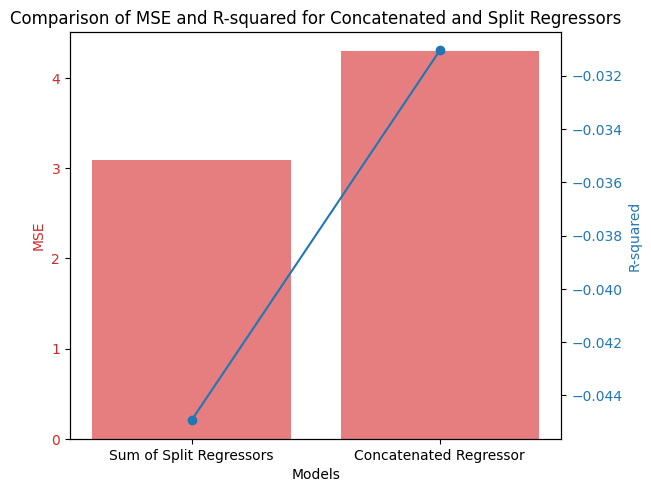

In [29]:
#TODO: Plot the mse and r^2 of concatenated regressor and sum of 2 split regressors on the same plot and add legend

# Sum of MSE and R-squared of two split models
mse_sum = mse_1 + mse_2
r2_sum = (r2_1 + r2_2) / 2  # Averaging the R^2 of the two models

# Step 4: Plot MSE and R-squared of concatenated regressor and sum of split regressors
models = ['Sum of Split Regressors', 'Concatenated Regressor']
mse_values = [mse_sum, mse_concated]
r2_values = [r2_sum, r2_concated]

fig, ax1 = plt.subplots()

# Plot MSE
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color='tab:red')
ax1.bar(models, mse_values, color='tab:red', alpha=0.6, label="MSE")
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create another y-axis for R-squared
ax2 = ax1.twinx()
ax2.set_ylabel('R-squared', color='tab:blue')
ax2.plot(models, r2_values, color='tab:blue', marker='o', label="R-squared")
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Add legends
fig.tight_layout()
plt.title("Comparison of MSE and R-squared for Concatenated and Split Regressors")
plt.show()

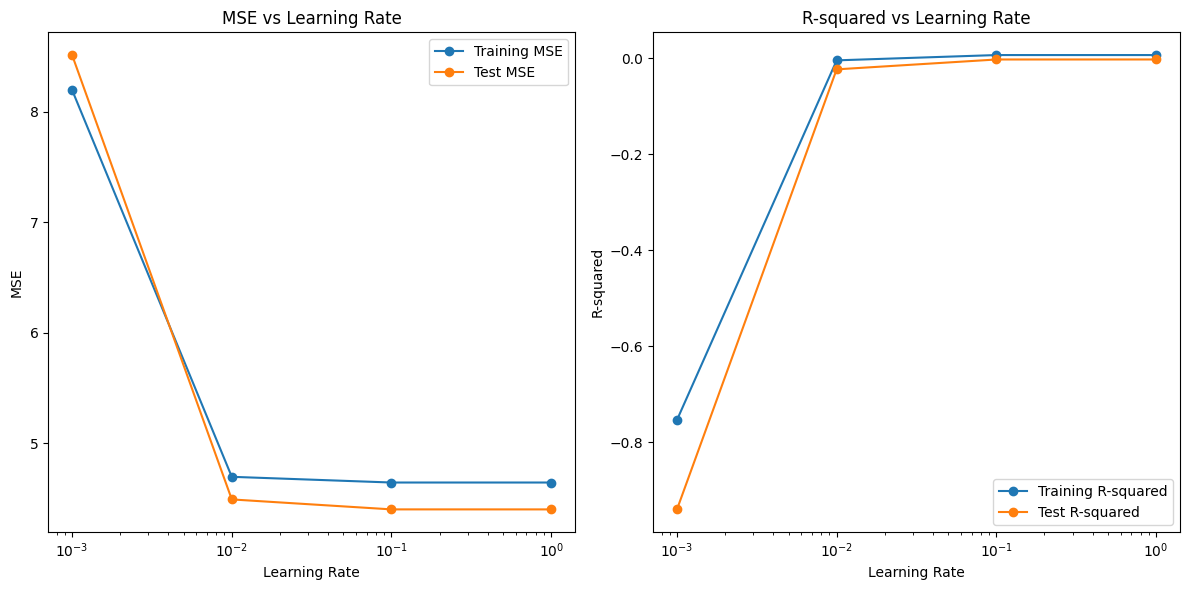

In [48]:
#TODO: Comparison of different weight decays and learning rates
# Testing different learning rates and plotting MSE and R-squared for each
# Testing different learning rates and plotting MSE and R-squared for each
learning_rates = [0.001, 0.01, 0.1, 1]
mse_train_values = []
mse_test_values = []
r_squared_train_values = []
r_squared_test_values = []

# Iterate over different learning rates
for lr in learning_rates:
    # Train the model on the training set with the current learning rate
    regressor_concated = LinearRegressor(X_train, y_train)
    regressor_concated.train(learning_rate=lr, n_iterations=1000, reg_lambda=0.01)
    
    # Calculate MSE and R-squared on training data using updated methods
    mse_train = regressor_concated.mse(X_train, y_train)
    r_squared_train = regressor_concated.r_squared(X_train, y_train)
    
    # Calculate MSE and R-squared on test data using updated methods
    mse_test = regressor_concated.mse(X_test, y_test)
    r_squared_test = regressor_concated.r_squared(X_test, y_test)

    # Store the results for plotting later
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    r_squared_train_values.append(r_squared_train)
    r_squared_test_values.append(r_squared_test)

# Plotting the MSE and R-squared values for different learning rates
plt.figure(figsize=(12, 6))

# MSE plot
plt.subplot(1, 2, 1)
plt.plot(learning_rates, mse_train_values, label='Training MSE', marker='o')
plt.plot(learning_rates, mse_test_values, label='Test MSE', marker='o')
plt.xscale('log')  # Log scale for learning rates
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('MSE vs Learning Rate')
plt.legend()

# R-squared plot
plt.subplot(1, 2, 2)
plt.plot(learning_rates, r_squared_train_values, label='Training R-squared', marker='o')
plt.plot(learning_rates, r_squared_test_values, label='Test R-squared', marker='o')
plt.xscale('log')  # Log scale for learning rates
plt.xlabel('Learning Rate')
plt.ylabel('R-squared')
plt.title('R-squared vs Learning Rate')
plt.legend()

plt.tight_layout()
plt.show()



# Step 9:

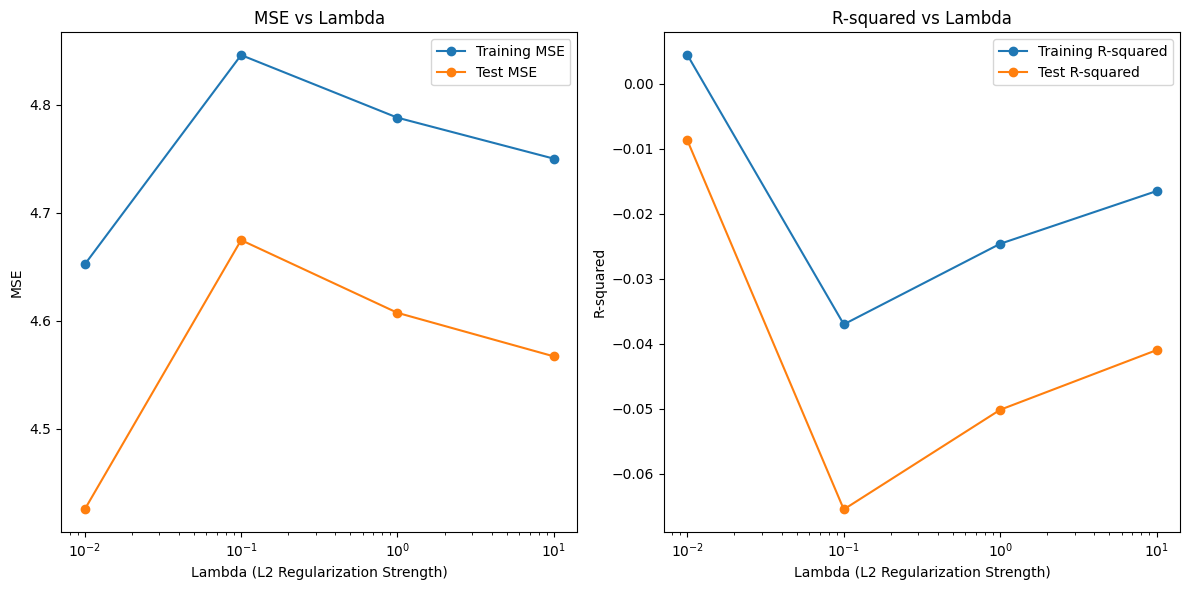

In [49]:
# Testing different values of lambda (L2 regularization strength) and plotting MSE and R-squared for each
lambda_values = [0.01, 0.1, 1, 10]
mse_train_values = []
mse_test_values = []
r_squared_train_values = []
r_squared_test_values = []

# Iterate over different lambda values
for reg_lambda in lambda_values:
    # Train the model on the training set with the current lambda value
    regressor_concated = LinearRegressor(X_train, y_train)
    regressor_concated.train(learning_rate=0.01, n_iterations=1000, reg_lambda=reg_lambda)
    
    # Calculate MSE and R-squared on training data using updated methods
    mse_train = regressor_concated.mse(X_train, y_train)
    r_squared_train = regressor_concated.r_squared(X_train, y_train)
    
    # Calculate MSE and R-squared on test data using updated methods
    mse_test = regressor_concated.mse(X_test, y_test)
    r_squared_test = regressor_concated.r_squared(X_test, y_test)

    # Store the results for plotting later
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    r_squared_train_values.append(r_squared_train)
    r_squared_test_values.append(r_squared_test)

# Plotting the MSE and R-squared values for different lambda values
plt.figure(figsize=(12, 6))

# MSE plot
plt.subplot(1, 2, 1)
plt.plot(lambda_values, mse_train_values, label='Training MSE', marker='o')
plt.plot(lambda_values, mse_test_values, label='Test MSE', marker='o')
plt.xscale('log')  # Log scale for lambda values
plt.xlabel('Lambda (L2 Regularization Strength)')
plt.ylabel('MSE')
plt.title('MSE vs Lambda')
plt.legend()

# R-squared plot
plt.subplot(1, 2, 2)
plt.plot(lambda_values, r_squared_train_values, label='Training R-squared', marker='o')
plt.plot(lambda_values, r_squared_test_values, label='Test R-squared', marker='o')
plt.xscale('log')  # Log scale for lambda values
plt.xlabel('Lambda (L2 Regularization Strength)')
plt.ylabel('R-squared')
plt.title('R-squared vs Lambda')
plt.legend()

plt.tight_layout()
plt.show()
